In [ ]:
# import pandas as pd

# fichier_entree = pd.read_json(r"C:\Users\DELL\Documents\GitHub\Wino-UROP\winogrande_1.1\train_xl.jsonl", lines=True)
# fichier_sortie = "class_2_cut.jsonl"



# # Lecture du fichier et filtrage
# with open(fichier_entree, "r", encoding="utf-8") as f_in:
#     lignes = f_in.readlines()

# # Garder une ligne sur deux
# lignes_filtrees = lignes[::2]  # [::2] = toutes les 2 lignes en partant de 0

# # Écriture du résultat dans un nouveau fichier
# with open(fichier_sortie, "w", encoding="utf-8") as f_out:
#     f_out.writelines(lignes_filtrees)

# print(f"{len(lignes_filtrees)} lignes conservées dans '{fichier_sortie}'.")
# files.download("train_xl_cut.jsonl")

TypeError: unhashable type: 'DataFrame'

In [ ]:
# import pandas as pd
# import json # Pour parser les lignes JSON si nécessaire

# # Le chemin du fichier doit être une chaîne de caractères pour open()
# chemin_fichier_jsonl = r"C:\Users\DELL\Documents\GitHub\Wino-UROP\winogrande_1.1\train_xl.jsonl"
# fichier_sortie = "train_xl_cut.jsonl"

# # Créer une liste pour stocker les lignes filtrées
# lignes_filtrees = []

# # Lecture du fichier ligne par ligne et garder une ligne sur deux
# # On utilise le chemin du fichier ici, pas le DataFrame
# with open(chemin_fichier_jsonl, "r", encoding="utf-8") as f_in:
#     all_lines = f_in.readlines() # Lit toutes les lignes

# # Garder une ligne sur deux
# # [::2] prend un élément sur deux, en commençant par le premier (index 0)
# lignes_filtrees = all_lines[::2]

# # Si vous voulez maintenant charger ces lignes filtrées dans un DataFrame Pandas:
# # Vous devez joindre les lignes pour qu'elles forment une seule chaîne JSONL,
# # puis utiliser io.StringIO pour que pd.read_json puisse les lire comme un fichier.
# import io
# filtered_jsonl_string = "".join(lignes_filtrees)
# df_filtered = pd.read_json(io.StringIO(filtered_jsonl_string), lines=True)

# # Afficher les premières lignes du DataFrame filtré pour vérification
# print("DataFrame filtré (une ligne sur deux) :")
# print(df_filtered.head())

# # Si votre but était d'écrire ces lignes filtrées dans un nouveau fichier CSV:
# # (Cela dépend de ce que vous voulez faire avec les données coupées)
# # Par exemple, si chaque ligne JSONL est un dictionnaire, vous pourriez les parser et les écrire en CSV
# # exemple_pour_csv = [json.loads(line) for line in lignes_filtrees]
# # df_for_csv = pd.DataFrame(exemple_pour_csv)
# # df_for_csv.to_csv(fichier_sortie, index=False, encoding="utf-8")
# # print(f"Fichier CSV '{fichier_sortie}' créé avec les lignes filtrées.")

# df_filtered.to_csv(fichier_sortie, index=False, encoding='utf-8')


DataFrame filtré (une ligne sur deux) :
                                qID  \
0  3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2   
1  3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1   
2  3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2   
3  3DW3BNF1GHG4SV9KHVCQWF4L0K98VE-2   
4  3DTJ4WT8BFTH45NSFTZT1T1BND3ZEV-2   

                                            sentence option1   option2  answer  
0  Ian volunteered to eat Dennis's menudo after a...     Ian    Dennis       2  
1  He never comes to my home, but I always go to ...    home     house       1  
2  Kyle doesn't wear leg warmers to bed, while Lo...    Kyle     Logan       2  
3  The GPS and map helped me navigate home.  I go...     GPS       map       2  
4  Emily looked up and saw Patricia racing by ove...   Emily  Patricia       2  


In [17]:
pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 12.0 MB/s eta 0:00:00


entrainer modèle pour classifier :
    -classification personelle
- associer les phrases à des cas féminins masculins ou neutre (classes)
ensuite : effacer les noms et voir si ça marche tjr
    => test de prédiction

- prendre des sujets : ex : faire un régime
    voir les thématiques associées à des femmes
    quand je fait la détection, ne pas utiliser les noms propres différents (NOM1)

    ensuite, inverser nom féminin et masculin et tester la réussite du schéma winogrande
    1 nom féminin, masculin  ou les 2

environ 200-400 annotation
éventuellement utiliser des recherches de mots (pas trop généraux et plusieurs)

utiliser : sklearn => word embeding (BERT)

ensuite : validation croisée , couper le corpus en pluseurs morceaux et faire le test plusieurs fois, car on manque de données
=> k fold

faire des stats sur les sous ensemble d'annotation

prendre RoBerta finetuné sur winograde et lui proposer de items non biaisé à résoudre et comparer les scores avecdes items biaisés

pour bert: faire en sorte que ça donne bien les embedding

In [13]:
from google.colab import files
uploaded = files.upload()


Saving phrases_annotees.csv to phrases_annotees.csv


sport
caring
wealth
advice

hesitation, question, advice
performance, sucess, competence
Failure
comparison of performance, road to sucess
relationship, helping

aussi : comptabiliser her/his pour les femmes/h

In [15]:
# import pandas as pd
# import re
# import numpy as np

# # Charger le fichier CSV
# df_original = pd.read_csv("class_2_cut.csv")  # Remplace par le nom réel

# def extract_sentence(text_string):
#     # Check if the input is a string before applying regex
#     if not isinstance(text_string, str):
#         return None # Return None for non-string inputs (like NaN)

#     # Regex pour trouver 'sentence ' suivi de n'importe quel caractère (.*?)
#     # jusqu'à la prochaine virgule et l'espace ', ' (qui précède généralement 'option1' ou d'autres clés)
#     # ou jusqu'à la fin de la chaîne si rien ne suit.
#     match = re.search(r'sentence\s(.*?)(?:,\soption1|, answer|\})$', text_string)

#     if match:
#         return match.group(1).strip() # .strip() pour supprimer les espaces blancs en début/fin
#     return None # Retourne None si la phrase n'est pas trouvée (cas d'erreur ou format inattendu)


# sentiment_mapping = {
#     'hesitation, question, advice': 0,
#     'comparison of performance, road to sucess': 0,
#     'other': 0,
#     'Failure': 1,
#     'relationship, helping' : 0,
#     'performance, sucess, competence' : 0,
#     'nan' : 0,
#     # Ajoutez d'autres sentiments si vous en avez, et mappez-les à 0 ou 1
# }

# df_original['succes'] = df_original['sentiment'].map(sentiment_mapping)
# df_original['clean_text'] = df_original['text'].apply(extract_sentence)
# df_original['succes'].fillna(0, inplace=True)

# # Option B: Si vous voulez que SEULEMENT un sentiment spécifique (par exemple 'succes') soit 1, et tout le reste 0
# # Décommentez et utilisez cette ligne à la place de l'Option A si c'est votre cas
# # df_original['succes'] = (df_original['sentiment'] == 'succes').astype(int)

# # --- Conversion en dictionnaire du format désiré ---
# data = {
#     'texte': df_original['clean_text'].tolist(),
#     'succes': df_original['succes'].tolist()
# }



# print("Dictionnaire converti :")
# # Affichons les premières entrées pour vérifier
# print("Texte (premières 5 entrées) :", data['texte'][:5])
# print("Succès (premières 5 entrées) :", data['succes'][:5])
# print(f"Nombre total de phrases : {len(data['texte'])}")
# print(f"Nombre total d'étiquettes : {len(data['succes'])}")

# # Vous pouvez maintenant utiliser ce dictionnaire 'data' pour créer votre DataFrame Pandas
# # comme dans les exemples précédents pour l'entraînement.
# df_for_training = pd.DataFrame(data)
# print("\nDataFrame pour l'entraînement (à partir du dictionnaire) :")
# print(df_for_training.head())

In [18]:
#nourriture

from nlpaug.augmenter.word import ContextualWordEmbsAug

import pandas as pd
import re
import numpy as np

# Charger le fichier CSV
df_original = pd.read_csv("phrases_annotees.csv")  # Remplace par le nom réel
df = df_original[df_original['label'] != -1]

positive_texts = df[df['label'] == 1]['phrase'].tolist()  # Phrases avec "nsp"
negative_texts = df[df['label'] == 0]['phrase'].tolist()  # Phrases sans "nsp"

aug = ContextualWordEmbsAug(
    model_path='bert-base-uncased',
    action="substitute",
    device='cuda'
)

# Augmentation seulement pour la classe minoritaire (positive)
augmented_positive = []
for text in positive_texts:
    augmented_positive += aug.augment(text, n=2)  # Génère 2 variantes par phrase

# Combinaison des données
texts = positive_texts + augmented_positive + negative_texts
labels = [1]*(len(positive_texts)+len(augmented_positive)) + [0]*len(negative_texts)

# Option B: Si vous voulez que SEULEMENT un sentiment spécifique (par exemple 'succes') soit 1, et tout le reste 0
# Décommentez et utilisez cette ligne à la place de l'Option A si c'est votre cas
# df_original['succes'] = (df_original['sentiment'] == 'succes').astype(int)

# --- Conversion en dictionnaire du format désiré ---
data_nourriture = {
    'texte': texts,
    'succes': labels
}



print("Dictionnaire converti :")
# Affichons les premières entrées pour vérifier
print("Texte (premières 5 entrées) :", data_nourriture['texte'][:5])
print("Succès (premières 5 entrées) :", data_nourriture['succes'][:5])
print(f"Nombre total de phrases : {len(data_nourriture['texte'])}")
print(f"Nombre total d'étiquettes : {len(data_nourriture['succes'])}")

# Vous pouvez maintenant utiliser ce dictionnaire 'data' pour créer votre DataFrame Pandas
# comme dans les exemples précédents pour l'entraînement.
df_for_training = pd.DataFrame(data_nourriture)
print("\nDataFrame pour l'entraînement (à partir du dictionnaire) :")
print(df_for_training.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The following layers were not sharded: cls.predictions.transform.dense.weight, bert.encoder.layer.*.attention.output.dense.bias, bert.embeddings.word_embeddings.weight, cls.predictions.transform.LayerNorm.weight, bert.encoder.layer.*.attention.self.key.bias, cls.predictions.bias, bert.encoder.layer.*.output.LayerNorm.weight, bert.encoder.layer.*.attention.self.key.weight, bert.encoder.layer.*.attention.self.query.bias, bert.encoder.layer.*.intermediate.dense.bias, bert.encoder.layer.*.attention.self.value.weight, bert.encoder.layer.*.attention.self.value.bias, bert.encoder.layer.*.attention.output.LayerNorm.bias, bert.encoder.layer.*.output.dense.bias, bert.embeddings.LayerNorm.bias, bert.encoder.layer.*.output.dense.weight, cls.predictions.transform.dense.bias, bert.encoder.layer.*.intermediate.dense.weight, bert.embeddings.position_embeddings.weight, cls.predictions.decoder.weight, cls.predictions.transform.LayerNorm.bias, bert.encoder.layer.*.output.LayerNorm.bias, bert.embeddings.L

Dictionnaire converti :
Texte (premières 5 entrées) : ['Ben had to either stop eating chocolates or nuts. He chose to stop eating the _ because they were sweet.', 'Elena was skinnier than Lindsey because _ liked to eat a lot of cabbage and vegetables.', 'Even though Christine lost more weight than Jessica, _ still ate more sweets overall despite this.', 'Jane decided to eat a salad instead of a sandwich because the _ had less calories and she was trying to diet.', 'In the village the healer created natural remedies and used berries but not herbs because the _ were healthy.']
Succès (premières 5 entrées) : [1, 1, 1, 1, 1]
Nombre total de phrases : 608
Nombre total d'étiquettes : 608

DataFrame pour l'entraînement (à partir du dictionnaire) :
                                               texte  succes
0  Ben had to either stop eating chocolates or nu...       1
1  Elena was skinnier than Lindsey because _ like...       1
2  Even though Christine lost more weight than Je...       1
3  Ja

In [19]:
data_nourriture


{'texte': ['Ben had to either stop eating chocolates or nuts. He chose to stop eating the _ because they were sweet.',
  'Elena was skinnier than Lindsey because _ liked to eat a lot of cabbage and vegetables.',
  'Even though Christine lost more weight than Jessica, _ still ate more sweets overall despite this.',
  'Jane decided to eat a salad instead of a sandwich because the _ had less calories and she was trying to diet.',
  'In the village the healer created natural remedies and used berries but not herbs because the _ were healthy.',
  'His parents hated that Ben loved cakes and apples. He decided to cut the _ from his diet to be healthy.',
  'The body of Dennis looks a lot slimmer than that of Steven, due to _ being on a diet.',
  'Robert ate lightly compared to Michael because _ was a model preparing for the fashion show.',
  'Every morning Christopher ate scones for breakfast while Justin ate yogurt since _ was unhealthy.',
  'Brett did not watch their salt intake like Neil be

In [ ]:
#ici, je fais le modèle de régression logistique avec BERT

import pandas as pd
from sklearn.model_selection import StratifiedKFold, learning_curve # Ajout de learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt # Pour la visualisation

# Simulation de df avec data_nourriture
# REMARQUE: Votre 'data_nourriture' n'est pas définie dans le snippet fourni.
# Je vais créer un DataFrame de simulation pour que le code soit exécutable.
# ASSUREZ-VOUS DE REMPLACER CELA AVEC VOTRE VRAI DF!

df = pd.DataFrame(data_nourriture)

print("Aperçu de notre jeu de données :")
print(df.head())
print(f"Nombre total d'échantillons: {len(df)}")
print(f"Nombre de succès (1): {df['succes'].sum()}")
print(f"Nombre de non-succès (0): {len(df) - df['succes'].sum()}")
print("-" * 50)

# 2. Définition du périphérique (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du périphérique : {device}")
print("-" * 50)

# 3. Chargement du tokenizer et du MODÈLE BERT (sans tête de classification)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.to(device)
model.eval()

print("Tokenizer et modèle BERT chargés et mis en mode évaluation.")
print("-" * 50)

# 4. Fonction pour obtenir les embeddings des phrases
def get_sentence_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

# Appliquer la fonction pour obtenir les embeddings pour toutes les phrases
print("Génération des embeddings BERT pour toutes les phrases...")
df['embedding'] = df['texte'].apply(get_sentence_embedding)

# X est maintenant la matrice des embeddings, y est la cible
X = np.stack(df['embedding'].tolist())
y = df['succes']

print(f"Dimension des embeddings : {X.shape}") # (nombre de phrases, dimension de l'embedding, e.g., 768)
print("-" * 50)



print("Génération des courbes d'apprentissage...")

# Définition du modèle pour les courbes d'apprentissage
# Utilisez les mêmes hyperparamètres que ceux que vous comptez évaluer/utiliser.
# C=0.1 est un bon point de départ pour une forte régularisation.
estimator = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=0.05)

# train_sizes: Les proportions du dataset à utiliser pour générer les points.
# cv: Le nombre de plis pour la validation croisée lors de la génération des courbes.
#     Utilisons StratifiedKFold pour maintenir l'équilibre des classes.
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy' # Vous pouvez changer 'accuracy' pour d'autres métriques
)

# Calcul des moyennes et écarts types pour les scores d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé des courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.title("Courbes d'apprentissage pour la Régression Logistique avec Embeddings BERT")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score (Précision)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de validation croisée")

plt.legend(loc="best")
plt.show()

print("Courbes d'apprentissage générées. Interprétez le graphique ci-dessus.")
print("-" * 50)


# 5. Configuration de la K-Fold Cross-Validation
n_splits = 5 # Vous pouvez ajuster ce nombre (ex: 3, 5, 10)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listes pour stocker les scores de chaque pli
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

print(f"Démarrage de la K-Fold Cross-Validation avec K={n_splits} plis...")
print("-" * 50)

# Itération sur chaque pli
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Pli {fold + 1}/{n_splits}")

    # Diviser les données pour le pli actuel
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Utiliser .iloc pour les Series pandas

    print(f"  Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
    print(f"  Taille de l'ensemble de test : {X_test.shape[0]}")

    # 6. Entraînement de la Régression Logistique pour ce pli
    log_reg_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=0.05)
    log_reg_model.fit(X_train, y_train)

    # 7. Évaluation du modèle sur l'ensemble de test de ce pli
    y_pred = log_reg_model.predict(X_test)

    # Stocker les métriques
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred, target_names=['Non-succès', 'Succès']))

    print(f"  Précision (Accuracy) pour ce pli : {accuracy_scores[-1]:.4f}")
    print(f"  Rapport de classification pour ce pli :\n{classification_reports[-1]}")
    print("-" * 40)

# Affichage des résultats agrégés de la K-Fold Cross-Validation
print("Résultats Agrégés de la K-Fold Cross-Validation :")
print(f"Précision (Accuracy) moyenne : {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})")
print(f"Précision (Precision) moyenne : {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores):.4f})")
print(f"Rappel (Recall) moyen : {np.mean(recall_scores):.4f} (+/- {np.std(recall_scores):.4f})")
print(f"Score F1 moyen : {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

print("\nMatrices de confusion pour chaque pli :")
for i, cm in enumerate(confusion_matrices):
    print(f"Pli {i+1}:\n{cm}")
print("-" * 50)


# 8. Prédiction sur de nouvelles phrases (exemples)
new_sentences = [
    "Ben had to either stop eating chocolates or nuts. He chose to stop eating the _ because they were sweet.",
    "The new product launch was a resounding success.",
    "Despite all efforts, the project completely failed."
]

print("Prédictions sur de nouvelles phrases avec BERT + Régression Logistique (modèle final sur tout le dataset) :")
final_log_reg_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=0.05)
final_log_reg_model.fit(X, y) # Entraînement sur tout le dataset pour la prédiction finale

for sentence in new_sentences:
    sentence_embedding = get_sentence_embedding(sentence)
    sentence_embedding_reshaped = sentence_embedding.reshape(1, -1)

    prediction = final_log_reg_model.predict(sentence_embedding_reshaped)[0]
    probabilities = final_log_reg_model.predict_proba(sentence_embedding_reshaped)[0]

    prediction_label = "Success" if prediction == 1 else "Non-success"
    prob_succes = probabilities[1]

    print(f"Sentence : '{sentence}' -> Prediction : {prediction_label} (Success Probability : {prob_succes:.2f})")
print("-" * 50)

Aperçu de notre jeu de données :
                                               texte  succes
0  Ben had to either stop eating chocolates or nu...       1
1  Elena was skinnier than Lindsey because _ like...       1
2  Even though Christine lost more weight than Je...       1
3  Jane decided to eat a salad instead of a sandw...       1
4  In the village the healer created natural reme...       1
Nombre total d'échantillons: 608
Nombre de succès (1): 276
Nombre de non-succès (0): 332
--------------------------------------------------
Utilisation du périphérique : cuda
--------------------------------------------------


The following layers were not sharded: encoder.layer.*.output.LayerNorm.weight, embeddings.token_type_embeddings.weight, encoder.layer.*.output.dense.weight, encoder.layer.*.intermediate.dense.weight, encoder.layer.*.intermediate.dense.bias, pooler.dense.bias, encoder.layer.*.attention.self.query.bias, encoder.layer.*.attention.self.query.weight, pooler.dense.weight, encoder.layer.*.output.LayerNorm.bias, encoder.layer.*.output.dense.bias, embeddings.word_embeddings.weight, encoder.layer.*.attention.self.value.bias, encoder.layer.*.attention.output.dense.weight, encoder.layer.*.attention.output.LayerNorm.weight, encoder.layer.*.attention.self.key.weight, embeddings.position_embeddings.weight, encoder.layer.*.attention.output.LayerNorm.bias, encoder.layer.*.attention.self.key.bias, encoder.layer.*.attention.output.dense.bias, encoder.layer.*.attention.self.value.weight, embeddings.LayerNorm.weight, embeddings.LayerNorm.bias


Tokenizer et modèle BERT chargés et mis en mode évaluation.
--------------------------------------------------
Génération des embeddings BERT pour toutes les phrases...
Dimension des embeddings après PCA : (608, 200)
--------------------------------------------------
Génération des courbes d'apprentissage...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.inter

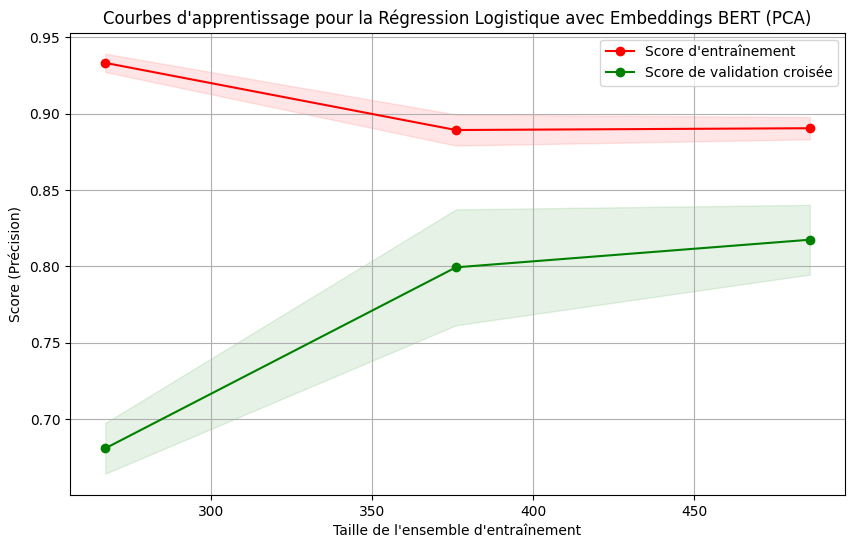

Courbes d'apprentissage générées. Interprétez le graphique ci-dessus.
--------------------------------------------------
Démarrage de la K-Fold Cross-Validation avec K=5 plis...
--------------------------------------------------
Pli 1/5
  Taille de l'ensemble d'entraînement : 486
  Taille de l'ensemble de test : 122
  Précision (Accuracy) pour ce pli : 0.8033
  Rapport de classification pour ce pli :
              precision    recall  f1-score   support

  Non-succès       0.82      0.82      0.82        66
      Succès       0.79      0.79      0.79        56

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.80       122
weighted avg       0.80      0.80      0.80       122

----------------------------------------
Pli 2/5
  Taille de l'ensemble d'entraînement : 486
  Taille de l'ensemble de test : 122
  Précision (Accuracy) pour ce pli : 0.8115
  Rapport de classification pour ce pli :
              precision    recall  f1-score   support

In [22]:
#même chose mais avec une PCA

import pandas as pd
from sklearn.model_selection import StratifiedKFold, learning_curve # Ajout de learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt # Pour la visualisation
from sklearn.decomposition import PCA

# Simulation de df avec data_nourriture
# REMARQUE: Votre 'data_nourriture' n'est pas définie dans le snippet fourni.
# Je vais créer un DataFrame de simulation pour que le code soit exécutable.
# ASSUREZ-VOUS DE REMPLACER CELA AVEC VOTRE VRAI DF!

df = pd.DataFrame(data_nourriture)

print("Aperçu de notre jeu de données :")
print(df.head())
print(f"Nombre total d'échantillons: {len(df)}")
print(f"Nombre de succès (1): {df['succes'].sum()}")
print(f"Nombre de non-succès (0): {len(df) - df['succes'].sum()}")
print("-" * 50)

# 2. Définition du périphérique (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du périphérique : {device}")
print("-" * 50)

# 3. Chargement du tokenizer et du MODÈLE BERT (sans tête de classification)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.to(device)
model.eval()

print("Tokenizer et modèle BERT chargés et mis en mode évaluation.")
print("-" * 50)

# 4. Fonction pour obtenir les embeddings des phrases
def get_sentence_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

# Appliquer la fonction pour obtenir les embeddings pour toutes les phrases
print("Génération des embeddings BERT pour toutes les phrases...")
df['embedding'] = df['texte'].apply(get_sentence_embedding)

# X est maintenant la matrice des embeddings, y est la cible
X = np.stack(df['embedding'].tolist())
y = df['succes']

n_components = 200 # Par exemple, essayez différentes valeurs
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X) # Apply PCA on the entire dataset


print(f"Dimension des embeddings après PCA : {X_pca.shape}") # (nombre de phrases, dimension de l'embedding, e.g., 300)
print("-" * 50)



print("Génération des courbes d'apprentissage...")

# Définition du modèle pour les courbes d'apprentissage
# Utilisez les mêmes hyperparamètres que ceux que vous comptez évaluer/utiliser.
# C=0.1 est un bon point de départ pour une forte régularisation.
estimator = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=0.05)

# train_sizes: Les proportions du dataset à utiliser pour générer les points.
# cv: Le nombre de plis pour la validation croisée lors de la génération des courbes.
#     Utilisons StratifiedKFold pour maintenir l'équilibre des classes.
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_pca, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy' # Vous pouvez changer 'accuracy' pour d'autres métriques
)

# Calcul des moyennes et écarts types pour les scores d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé des courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.title("Courbes d'apprentissage pour la Régression Logistique avec Embeddings BERT (PCA)")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score (Précision)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de validation croisée")

plt.legend(loc="best")
plt.show()

print("Courbes d'apprentissage générées. Interprétez le graphique ci-dessus.")
print("-" * 50)


# 5. Configuration de la K-Fold Cross-Validation
n_splits = 5 # Vous pouvez ajuster ce nombre (ex: 3, 5, 10)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listes pour stocker les scores de chaque pli
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

print(f"Démarrage de la K-Fold Cross-Validation avec K={n_splits} plis...")
print("-" * 50)

# Itération sur chaque pli
for fold, (train_index, test_index) in enumerate(skf.split(X_pca, y)): # Use X_pca for splitting
    print(f"Pli {fold + 1}/{n_splits}")

    # Diviser les données pour le pli actuel
    X_train, X_test = X_pca[train_index], X_pca[test_index] # Use X_pca for splitting
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Utiliser .iloc pour les Series pandas

    print(f"  Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
    print(f"  Taille de l'ensemble de test : {X_test.shape[0]}")

    # 6. Entraînement de la Régression Logistique pour ce pli
    log_reg_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=0.05)
    log_reg_model.fit(X_train, y_train)

    # 7. Évaluation du modèle sur l'ensemble de test de ce pli
    y_pred = log_reg_model.predict(X_test)

    # Stocker les métriques
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred, target_names=['Non-succès', 'Succès']))

    print(f"  Précision (Accuracy) pour ce pli : {accuracy_scores[-1]:.4f}")
    print(f"  Rapport de classification pour ce pli :\n{classification_reports[-1]}")
    print("-" * 40)

# Affichage des résultats agrégés de la K-Fold Cross-Validation
print("Résultats Agrégés de la K-Fold Cross-Validation :")
print(f"Précision (Accuracy) moyenne : {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})")
print(f"Précision (Precision) moyenne : {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores):.4f})")
print(f"Rappel (Recall) moyen : {np.mean(recall_scores):.4f} (+/- {np.std(recall_scores):.4f})")
print(f"Score F1 moyen : {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

print("\nMatrices de confusion pour chaque pli :")
for i, cm in enumerate(confusion_matrices):
    print(f"Pli {i+1}:\n{cm}")
print("-" * 50)


# 8. Prédiction sur de nouvelles phrases (exemples)
new_sentences = [
    "Ben had to either stop eating chocolates or nuts. He chose to stop eating the _ because they were sweet.",
    "The new product launch was a resounding success.",
    "Despite all efforts, the project completely failed."
]

print("Prédictions sur de nouvelles phrases avec BERT + Régression Logistique (modèle final sur tout le dataset) :")
final_log_reg_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=0.05)
final_log_reg_model.fit(X_pca, y) # Entraînement sur tout le dataset après PCA pour la prédiction finale

for sentence in new_sentences:
    sentence_embedding = get_sentence_embedding(sentence)
    sentence_embedding_reshaped = sentence_embedding.reshape(1, -1) # Reshape for PCA transform
    sentence_embedding_pca = pca.transform(sentence_embedding_reshaped) # Use pca.transform, not fit_transform

    prediction = final_log_reg_model.predict(sentence_embedding_pca)[0] # Predict using the PCA-transformed embedding
    probabilities = final_log_reg_model.predict_proba(sentence_embedding_pca)[0] # Predict probabilities

    prediction_label = "Success" if prediction == 1 else "Non-success"
    prob_succes = probabilities[1]

    print(f"Sentence : '{sentence}' -> Prediction : {prediction_label} (Success Probability : {prob_succes:.2f})")
print("-" * 50)

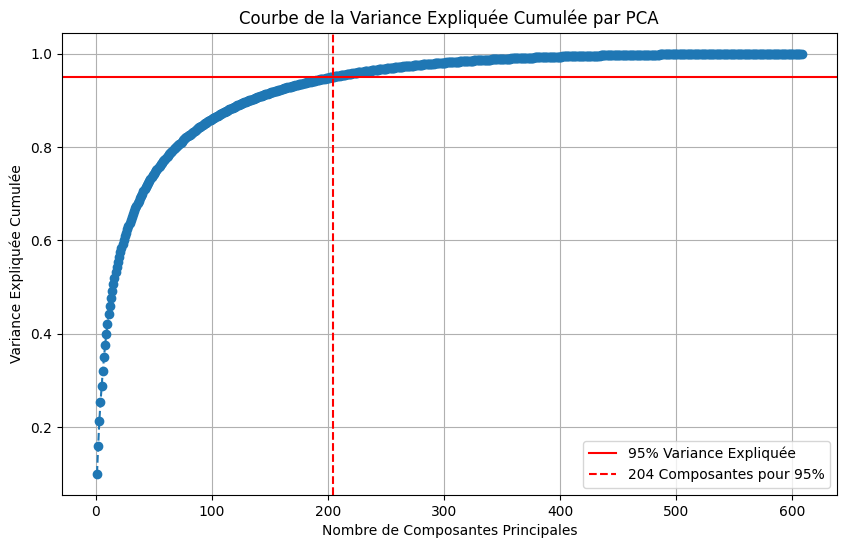

Nombre de composantes nécessaires pour expliquer 95% de la variance : 204


In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que X est défini et contient vos embeddings (e.g., de 768 dimensions)

# Entraîner une PCA sans réduction pour observer la variance expliquée
# max_components = min(X.shape[0], X.shape[1])
# Avec 600 samples et 768 features, min(600, 768) = 600.
# Donc la PCA pourra extraire au maximum 600 composantes significatives
# (ou 599 si on compte l'offset de l'intercepte)
pca_full = PCA().fit(X)

# Calculer la variance expliquée cumulée
explained_variance_ratio_cumsum = np.cumsum(pca_full.explained_variance_ratio_)

# Tracer le graphique du "coude"
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Expliquée Cumulée')
plt.title('Courbe de la Variance Expliquée Cumulée par PCA')
plt.grid(True)

# Ajouter des lignes pour des seuils courants, par exemple 95%
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Expliquée')
plt.axvline(x=np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1, color='r', linestyle='--', label=f'{np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1} Composantes pour 95%')
plt.legend(loc='best')
plt.show()

# Trouver le nombre de composantes pour un certain seuil de variance (par exemple 95%)
n_components_95_percent_variance = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1
print(f"Nombre de composantes nécessaires pour expliquer 95% de la variance : {n_components_95_percent_variance}")

from logging import raiseExceptions
vrai positifs et négatifs
check : prendre plein des fois la même phrase et voir si c'est bien reconnu
faire un graphe de la probabilité en fonction des différentes itéraiseExceptions


est ce que c'est possible de faire dans l'autre sens ? => partir des embeddings moyens => et arriver à des catégories
à grande dimension, on peut mettre un nb exp de vecteurs orthogonaux
anisotropie => ragarder papier,
on a des connes : car faire des sommes d'objets dans tous les espaces => n'encode rien


faire un classifier pour les femmes et les hommes
voir les corrélations des dimmensions avec le genre
mettre un couche linéaire : 768 dimension => score


réunion vendredi mitn llm : rammener des questions de recherche et des hypothèses
voir le vocabulaire très genré, ex : diet
faire des permutations des prénomask

utiliser she ou he
refaire tourner


éviter la comparaison : car c'est trop syntaxique
prendre des sujets plus concrets
bricolage
scolaire
